In [42]:
# Importamos las librerías que utilizaremos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [43]:
# Abrimos el dataset que analizaremos en este notebook
df = pd.read_csv("steam_games.csv")

In [44]:
# Utilizamos la función "describe" de pandas para obtener
# un resumen de que contiene este dataset
df.describe(include= 'all')

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
count,24064,28852,32133,30085,32135,30068,31972,225.000000,32133,31465,30750.000000,32135,3.213300e+04,28836,24953,2607.000000
unique,8236,883,32094,30054,32135,3582,15395,NaN,32132,4649,NaN,2,NaN,10992,18,NaN
top,Ubisoft,['Action'],Soundtrack,Soundtrack,http://store.steampowered.com/app/761140/Lost_...,2012-10-16,"['Casual', 'Simulation']",NaN,http://steamcommunity.com/app/612880/reviews/?...,['Single-player'],NaN,False,NaN,Ubisoft - San Francisco,Mixed,NaN
freq,385,1880,3,3,1,100,1292,NaN,2,2794,NaN,30188,NaN,1259,4103,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.930533,NaN,NaN,8.899991,NaN,4.517574e+05,NaN,NaN,72.255466
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.492643,NaN,NaN,16.342327,NaN,1.827140e+05,NaN,NaN,10.833525
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.490000,NaN,NaN,0.000000,NaN,1.000000e+01,NaN,NaN,20.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.390000,NaN,NaN,2.990000,NaN,3.292800e+05,NaN,NaN,66.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.190000,NaN,NaN,4.990000,NaN,4.520600e+05,NaN,NaN,74.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.660000,NaN,NaN,9.990000,NaN,5.934000e+05,NaN,NaN,80.000000


In [45]:
# Observamos los tipos de datos que contiene cada columna
df.dtypes

publisher          object
genres             object
app_name           object
title              object
url                object
release_date       object
tags               object
discount_price    float64
reviews_url        object
specs              object
price             float64
early_access         bool
id                float64
developer          object
sentiment          object
metascore         float64
dtype: object

Veamos cuantos valores faltantes posee cada columna del DataFrame:

In [46]:
# Creamos una variable que contenga la cantidad de nulos que cada columna posea
nulls = df.isnull().sum()
# Mostramos un diccionario que muestre cuantos valores nulos tiene cada columna.
dict(nulls)

{'publisher': 8071,
 'genres': 3283,
 'app_name': 2,
 'title': 2050,
 'url': 0,
 'release_date': 2067,
 'tags': 163,
 'discount_price': 31910,
 'reviews_url': 2,
 'specs': 670,
 'price': 1385,
 'early_access': 0,
 'id': 2,
 'developer': 3299,
 'sentiment': 7182,
 'metascore': 29528}

Podemos observar que todo los valores faltantes se distribuyen en todo el dataset, exceptuando dos columnas: *"url"* y *"early_access"*. Luego tenemos columnas con muchos más valores faltantes que datos válidos, como: *"metascore"* o *"discount_price"*.

Visualicemos, a continuación, como se distribuyen los valores faltantes en función de su posición en el set con el siguiente gráfico:

<Axes: >

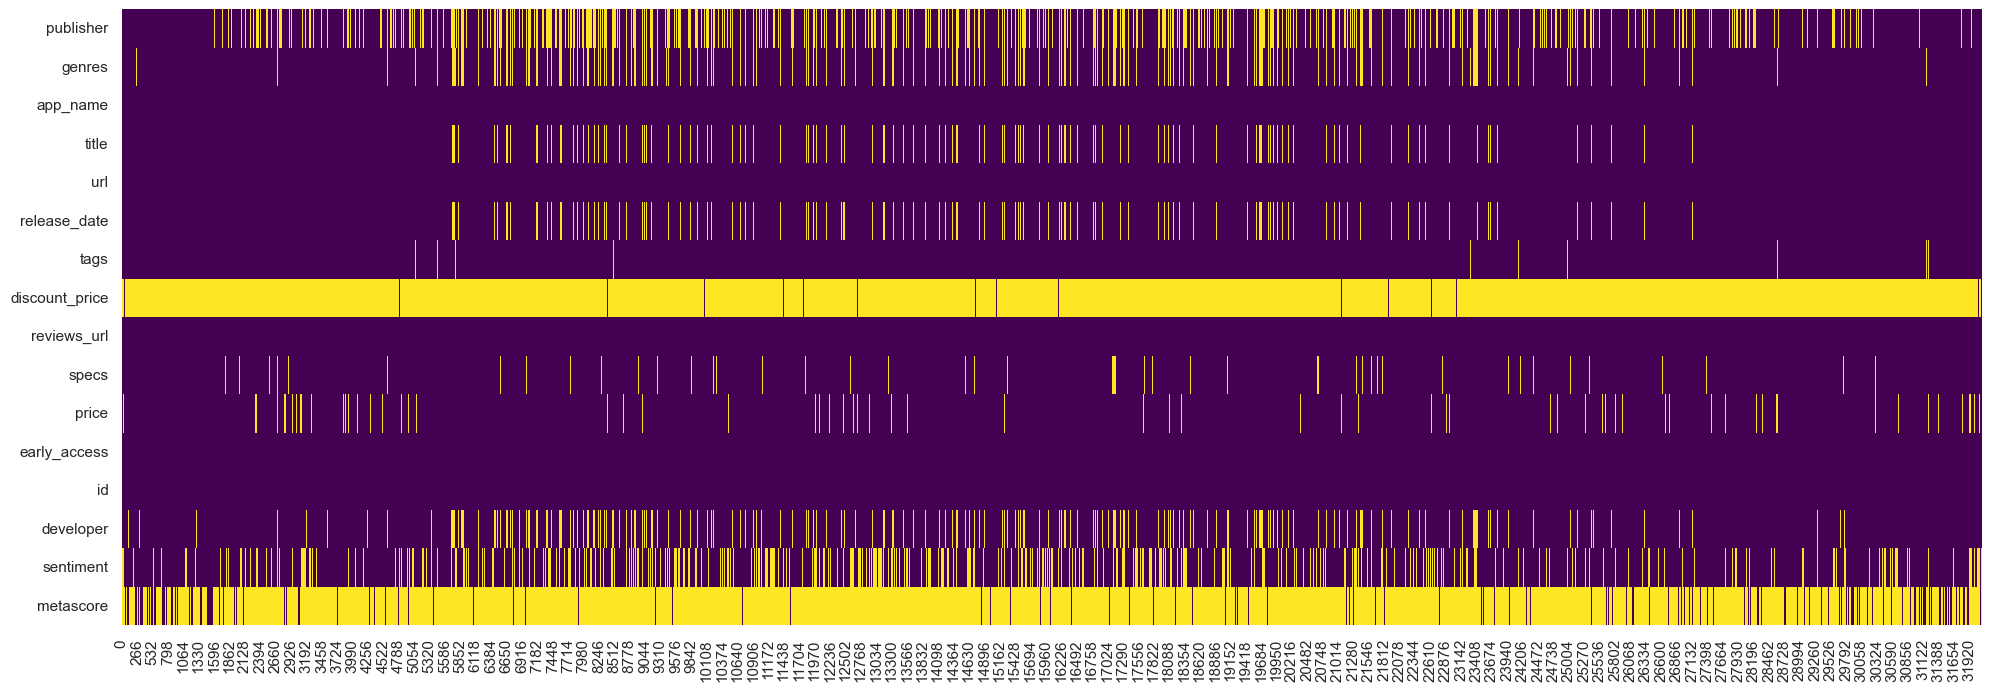

In [47]:
# Instanciamos el tamaño del gráfico
plt.figure(figsize= (24,8))
# Definimos el gráfico que queremos, con la característica que destaque a los nulos,
# devolviendo en tipo entero, con el mapa de color 'viridis' que mostrará a los
# nulos en color amarillo.
sns.heatmap(df.isnull().astype(int).T, cmap= 'viridis', cbar= False)

Podemos observar que los valores no tienen ninguna condición que provoque la presencia de valores nulos.

Veamos ahora como se distribuyen, dentro de las varaibles numéricas, como se distribuyen los datos.

{'Q1': 2.99, 'Q2': 4.99, 'Q3': 9.99, 'iqr': 7.0, 'Bigote inferior': -7.51, 'Bigote Superior': 20.490000000000002}
 Outliers por debajo del bigote inferior : 0, Outliers superiores al bigote superior : 1885


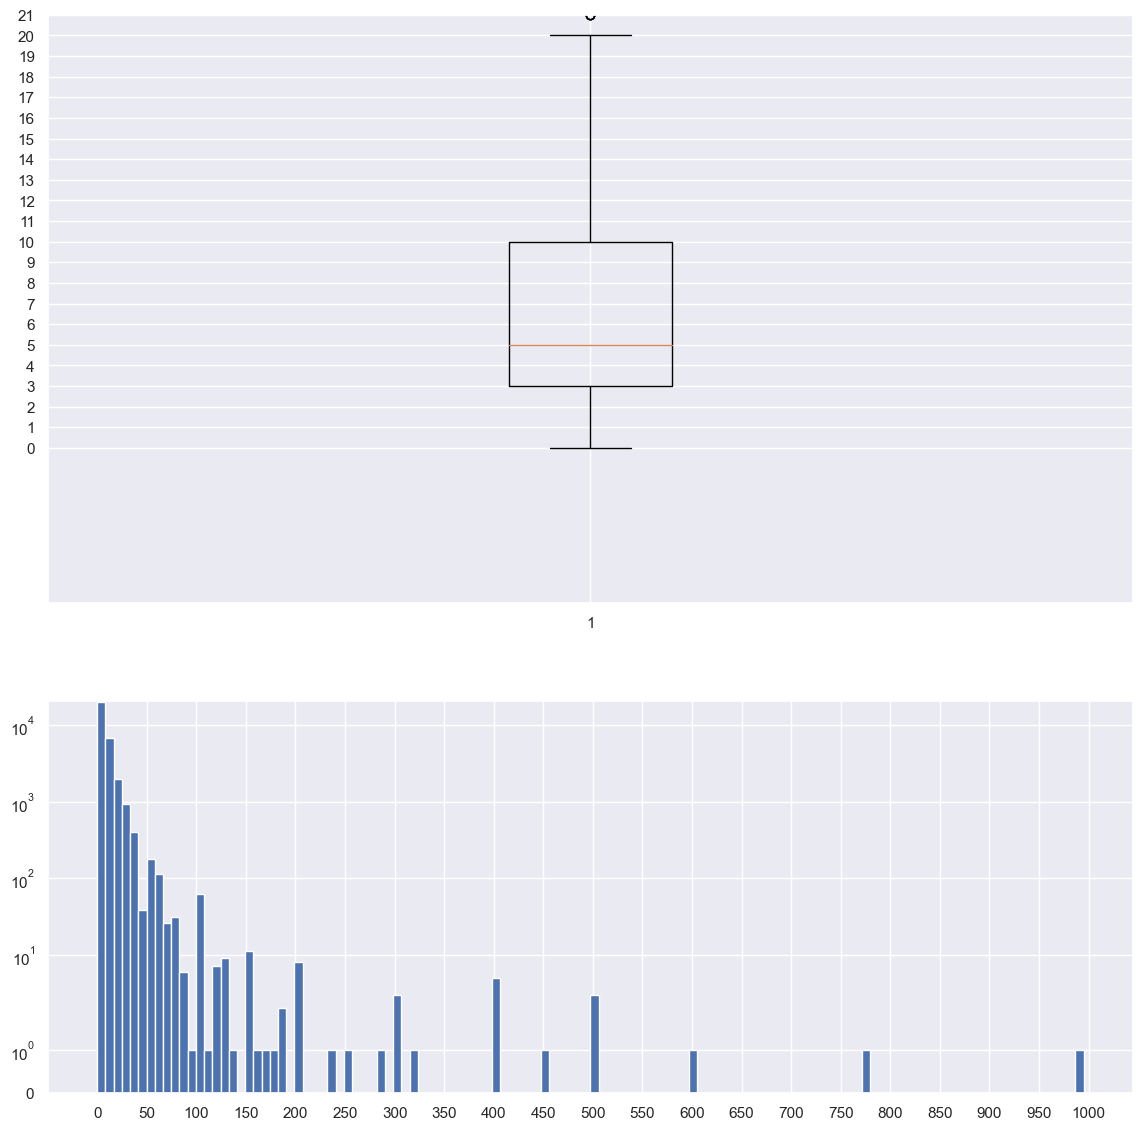

In [48]:
# Declaramos la variable que contega los precios, sin nulos.
_df = df['price'].dropna(axis= 0)
# Obtenemos la mediana
q2 = np.median(_df)
# El primer cuartil
q1 = np.percentile(_df, 25)
# El tercer cuartil
q3 = np.percentile(_df, 75)
# El rango intercuartil
iqr = q3 - q1
# El bigote inferior
lim_big_inf = q1 - (1.5 * iqr)
# El bigote superior
lim_big_sup = q3 + (1.5 * iqr)
# Los valores menores al bigote inferior
outliers_inf = lim_big_inf > _df
# Los valores mayores al bigote superior
outliers_sup = _df > lim_big_sup
# Imprimimos por pantalla el diccionario con los valores de cada
# parte de nuestro boxplot
print({
    "Q1" : q1,
    "Q2" : q2,
    "Q3" : q3,
    'iqr' : iqr,
    'Bigote inferior' : lim_big_inf,
    'Bigote Superior' : lim_big_sup
})
#  Imprimimos también las cantidades de valores que están por fuera de nuestro diagrama de caja
print(f' Outliers por debajo del bigote inferior : {outliers_inf.sum()}, Outliers superiores al bigote superior : {outliers_sup.sum()}')

# Instanciamos la forma de nuestros gráficos, con una columna y dos filas,
# con un tamaño de (14,14) y una dimensión entre gráficos de tres (para el primer gráfico) a dos (para el segundo)
fig, ax = plt.subplots(2, 1, figsize = (14,14), gridspec_kw= {'height_ratios':[3,2]})

# Configuramos el primer gráfico
# Definimos el diagrama de caja
ax[0].boxplot(_df)
# Ajustamos los límites a los valores de los bigotes de la caja
ax[0].set_ylim(lim_big_inf, lim_big_sup)
# Agregamos más referencias al eje y
ax[0].set_yticks(np.linspace(0, 21, 22))

#Configuramos el segundo gráfico
# Definimos los datos del histograma
ax[1].hist(list(_df), bins= 120)
# Mejoramos las referencias del eje x
ax[1].set_xticks(np.linspace(0,1000,21))
# Ajustamos la escala del eje y para visualizar mejor la diferencia en el histograma
ax[1].set_yscale('symlog')

# Mostramos el gráfico
plt.show()

Podemos ver en el boxplot que la gran mayoría de los precios se encuentran entre **$2.99** y **$9.99**. Que son el Q1 (Primer cuartil) y Q3 (Tercer cuartil). 

Como nos lo indica el análisis, hay muchísimo outliers que superan el valor del bigote superior. Hay muchos precios superiores a un valor relativamente común que solamente están presentes en un solo juego. Es decir, que aparecen una sola vez en el dataset. Podemos tratar eso, quitándolos para el entrenamiento de nuestro dataset, ya que puede alterar nuestras mediciones y entrenamiento.

Analicemos ahora los outliers con la regla de las tres sigmas, para ver si la cantidad de outliers con este método es diferente.

In [49]:
# Obtenemos la media
media = np.mean(_df)
# Obtenemos la desviación estandar
standard = np.std(_df)

# Definimos el rango del primer sigma
rango_una_sigma = (media - standard, media + standard)
# Definimos el rango del segundo y tercer sigma
rango_dos_sigmas = (media - 2 * standard, media + 2 * standard)
rango_tres_sigmas = (media - 3 * standard, media + 3 * standard)

# Hacemos la suma de valores que están dentro de los rango de cada sigma.
# Por cada precio que se encuentre en el rango se sumará 1.
valores_una_sigma = sum(1 for valor in _df if rango_una_sigma[0] <= valor <= rango_una_sigma[1])
valores_dos_sigmas = sum(1 for valor in _df if rango_dos_sigmas[0] <= valor <= rango_dos_sigmas[1])
valores_tres_sigmas = sum(1 for valor in _df if rango_tres_sigmas[0] <= valor <= rango_tres_sigmas[1])

# Imprimimos por pantalla las cantidades de valores que cada rango posee
print(
    {
        "Valores dentro de un sigma" : valores_una_sigma,
        "Valores dentro de dos sigmas" : valores_dos_sigmas,
        "Valores dentro de tres sigmas": valores_tres_sigmas
    } ,
    # También mostramos la cantidad de outliers.
    {
        "Valores fuera de los tres sigmas" : _df.shape[0] - valores_tres_sigmas
    }
)

{'Valores dentro de un sigma': 29287, 'Valores dentro de dos sigmas': 30230, 'Valores dentro de tres sigmas': 30447} {'Valores fuera de los tres sigmas': 303}


Podemos ver que existen menos outliers que están fuera del rango, en comparación con el gráfico de caja. Veamos de forma visual el analisis de valores con la regla de las tres sigmas.

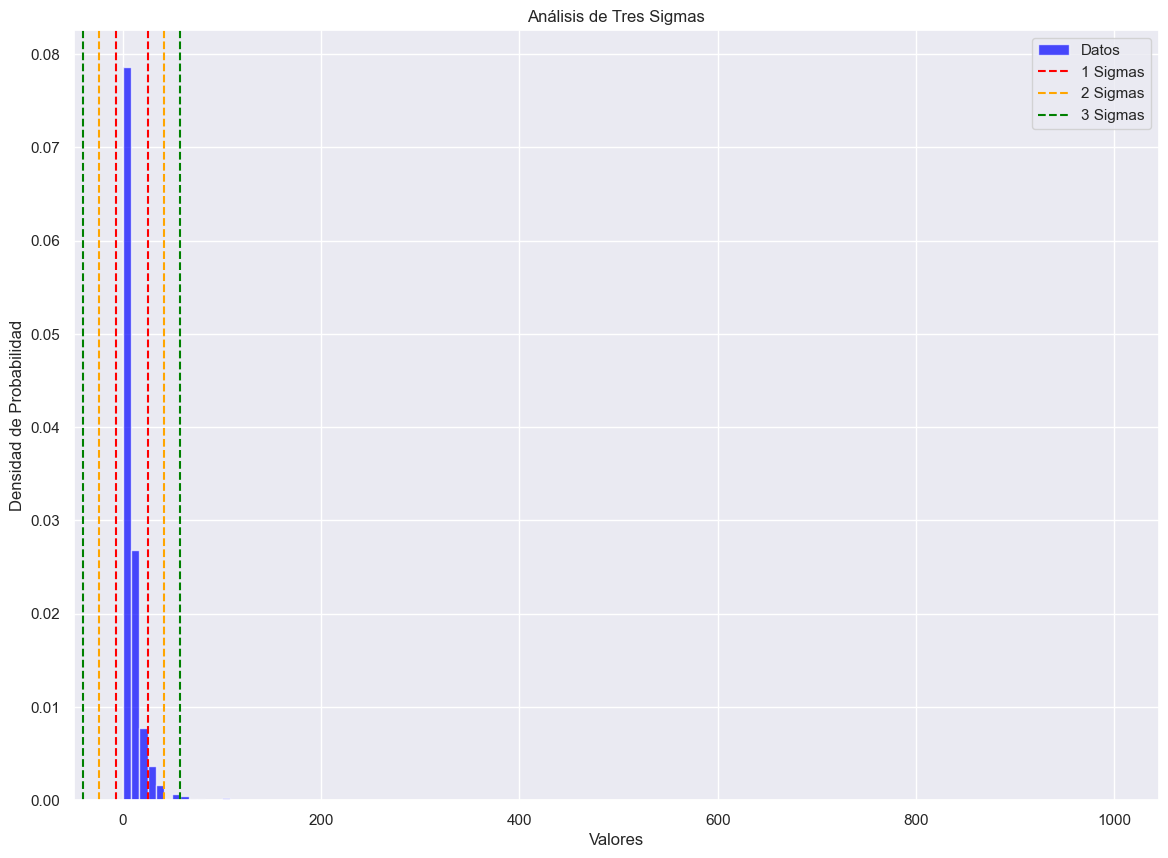

In [50]:
# Creamos un histograma para los datos
plt.figure(figsize = (14,10))
plt.hist(_df, bins=120, density=True, alpha=0.7, color='blue', label='Datos')

# Graficamos los rangos de tres sigmas
plt.axvline(x=rango_una_sigma[0], color='red', linestyle='--', label='1 Sigmas')
plt.axvline(x=rango_una_sigma[1], color='red', linestyle='--')
plt.axvline(x=rango_dos_sigmas[0], color='orange', linestyle='--', label='2 Sigmas')
plt.axvline(x=rango_dos_sigmas[1], color='orange', linestyle='--')
plt.axvline(x=rango_tres_sigmas[0], color='green', linestyle='--', label='3 Sigmas')
plt.axvline(x=rango_tres_sigmas[1], color='green', linestyle='--')

# Ponemos los títulos y etiquetas
plt.xlabel('Valores')
plt.ylabel('Densidad de Probabilidad')
plt.title('Análisis de Tres Sigmas')
plt.legend()

# Mostramos el gráfico
plt.show()

Como el gráfico nos muestra, existen valores que están por fuera del tercer sigma y que no representa casi nada en la distribución de los precios

Obtengamos la lista de outliers.

In [51]:
# Definimos la lista de valores outliers con una función que toma los valores que sean mayores
# al valor superior del rango del tercer sigma
outliers_list = [valor for valor in _df if valor > rango_tres_sigmas[1]]
# Veamos los outliers
outliers_list

[59.99,
 61.99,
 74.76,
 99.99,
 59.99,
 69.99,
 79.99,
 99.99,
 99.99,
 119.99,
 79.99,
 59.99,
 109.99,
 59.99,
 99.99,
 149.99,
 771.71,
 99.99,
 89.99,
 99.99,
 99.99,
 79.99,
 79.99,
 139.92,
 59.99,
 64.99,
 64.99,
 64.99,
 74.99,
 79.99,
 59.99,
 59.99,
 99.99,
 89.99,
 59.99,
 99.99,
 59.99,
 299.99,
 64.99,
 99.99,
 59.99,
 99.99,
 119.99,
 59.99,
 99.99,
 99.99,
 99.99,
 99.99,
 99.99,
 99.99,
 149.99,
 234.99,
 59.99,
 119.99,
 59.99,
 59.99,
 69.99,
 79.99,
 59.99,
 59.99,
 199.0,
 59.99,
 59.99,
 64.99,
 64.99,
 99.99,
 189.0,
 69.99,
 59.99,
 99.99,
 69.99,
 59.99,
 129.99,
 129.99,
 179.0,
 59.99,
 99.99,
 59.99,
 99.99,
 79.99,
 99.99,
 69.99,
 59.99,
 59.99,
 99.99,
 399.99,
 399.99,
 149.99,
 59.99,
 59.99,
 119.99,
 59.99,
 399.0,
 79.99,
 119.99,
 59.99,
 59.99,
 149.99,
 99.99,
 59.99,
 99.99,
 69.99,
 79.99,
 149.99,
 129.99,
 69.99,
 59.99,
 59.99,
 119.99,
 79.99,
 79.99,
 199.99,
 59.99,
 69.99,
 59.99,
 59.99,
 320.0,
 71.7,
 99.99,
 59.99,
 59.95,
 99.99,
 59

Veamos si están todos los outliers, comparando con el valor anterior de nuestro análisis.

In [52]:
# Obtenemos la diferencia entre la cantidad de outliers que calculamos
# anteriormente y cuantos valores posee la lista.
diff = (_df.shape[0] - valores_tres_sigmas) - len(outliers_list)
# Imprimimos la diferencia
print(diff)

0


Al ver que dentro de esa lista, están todos los outliers, procedemos a tener el dataframe que no contenga estos valores.

In [53]:
df = df[~df['price'].isin(outliers_list)]
df.head(1)

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
0,Kotoshiro,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",4.49,http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],4.99,False,761140.0,Kotoshiro,NaN,NaN


Veamos como de relacionados están los precios de los juegos con el metascore que recibieron y con los sentimientos que causó.

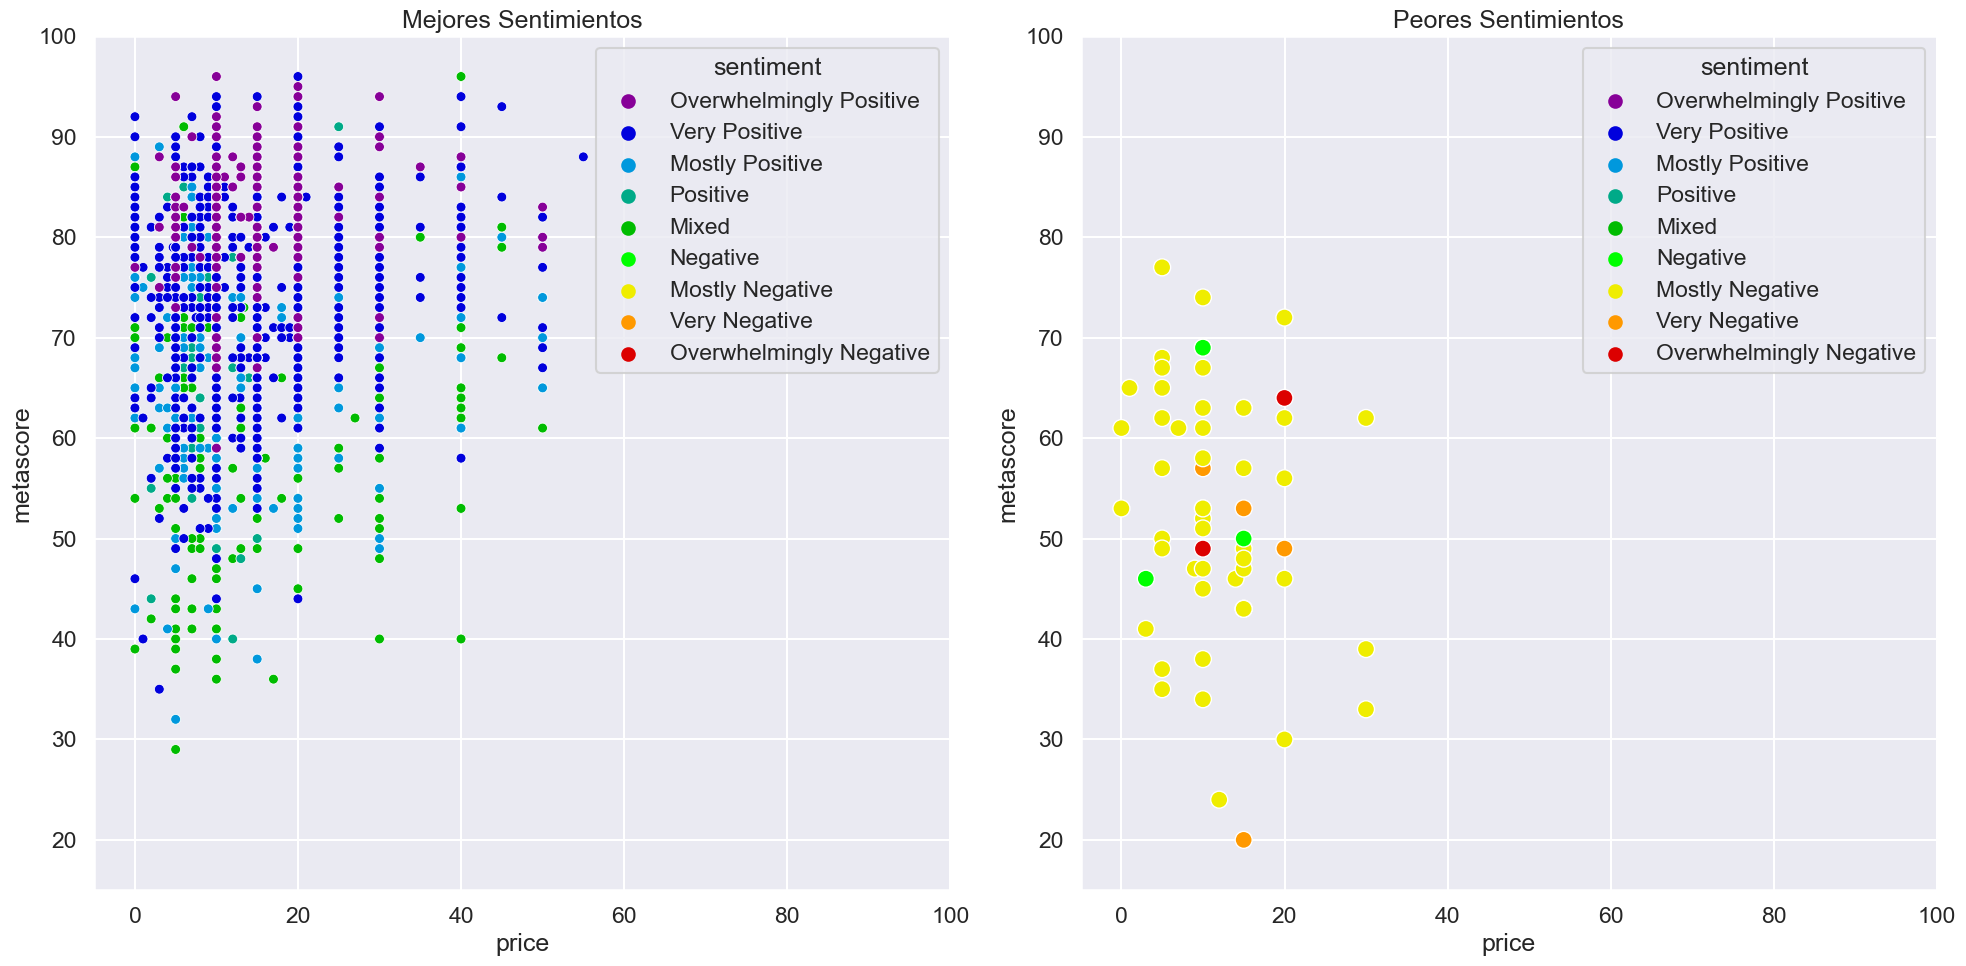

In [54]:
# Filtrar los valores que no contienen la palabra "user" en la columna "sentiment"
_df = df[~df['sentiment'].str.contains("user", na=False)]

# Creamos la lista con los sentimientos ordenados
sentiment_order = [
    "Overwhelmingly Positive",
    "Very Positive",
    "Mostly Positive",
    "Positive",
    "Mixed",
    "Negative",
    "Mostly Negative",
    "Very Negative",
    "Overwhelmingly Negative"
]

# Crear una categoría personalizada para la columna "sentiment"
_df['sentiment'] = pd.Categorical(_df['sentiment'], categories=sentiment_order, ordered=True)

# Ordenar el DataFrame según la categoría personalizada
_df = _df.sort_values('sentiment', ascending=False)

# Dividir el DataFrame en dos DataFrames separados: mejores_sentimientos y peores_sentimientos
mejores_sentimientos = _df[_df['sentiment'].isin(['Overwhelmingly Positive', 'Very Positive', 'Mostly Positive', 'Positive', 'Mixed'])]
peores_sentimientos = _df[_df['sentiment'].isin(['Negative', 'Mostly Negative', 'Very Negative', 'Overwhelmingly Negative'])]

# Crear dos gráficos separados para cada DataFrame con los mismos límites en los ejes
plt.figure(figsize=(20, 10))
sns.set(style='darkgrid', palette= 'bright')
sns.set(context= 'talk')

# Primer gráfico para los mejores sentimientos
plt.subplot(1, 2, 1)
sns.scatterplot(x=mejores_sentimientos['price'], y=mejores_sentimientos['metascore'], hue=mejores_sentimientos['sentiment'], palette='nipy_spectral', s=50)
plt.title('Mejores Sentimientos')
plt.xlim(-5, 100)
plt.ylim(15, 100)

# Segundo gráfico para los peores sentimientos
plt.subplot(1,2, 2)
sns.scatterplot(x=peores_sentimientos['price'], y=peores_sentimientos['metascore'], hue=peores_sentimientos['sentiment'], palette='nipy_spectral', s=150)
plt.title('Peores Sentimientos')
plt.xlim(-5, 100)
plt.ylim(15, 100)

# Ajustar la disposición de los gráficos para que no haya superposición de etiquetas
plt.tight_layout()

# Mostrar los dos gráficos
plt.show()


Podemos concluir, con los dos gráficos anteriores, que los juegos que tuvieron una crítica negativa **(gráfico de la deracha)** no obtuvieron un puntaje alto en metascore, independientemente de su precio. Más bien, se concentran en el medio del metascore.

En cambio, los juegos bien recibidos por la crítica, obtuvieron una puntuación mayor de metascore. Además, podemos deducir que el precio afecta en la crítica del juego: ningún juego con un precio elevado *(mayor a $50)* tuvo la máxima distinción dentro del sentimiento *("Overwhelmingly Positive")*.

También, dentro del primer gráfico, podemos observar como la mayoría de juegos que tuvieron la calificación de *"Mixed"* está, en promedio, en la zona media de la puntuación del metascore. Por debajo de las demás categorías.

Comparando ambos gráficos, también podemos deducir que, en proporción, hay muchos más juegos de buena calidad, con un buen recibimiento de la crítica y con un buen metascore.

Veamos, que tan relacionadas están las variables del dataset, y si tienen impacto en el precio.

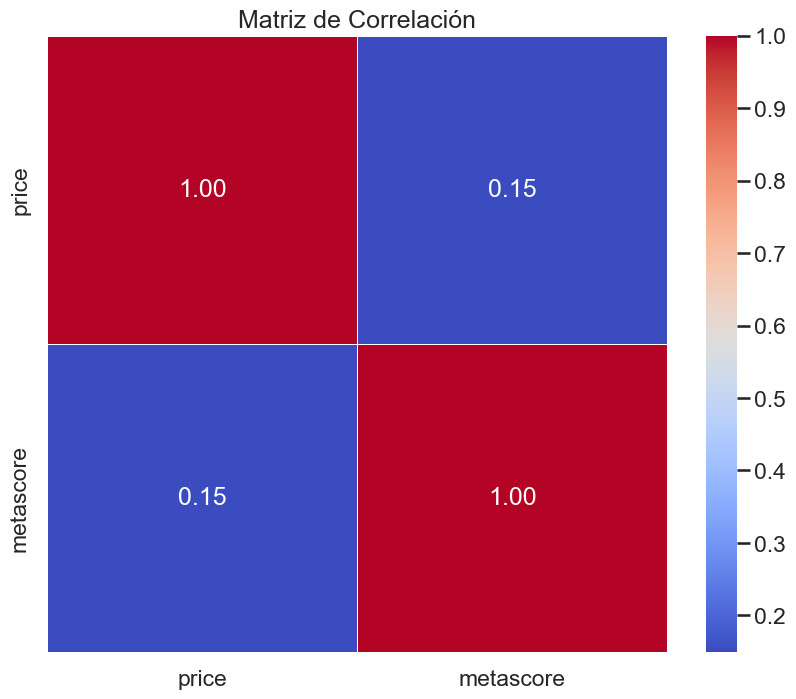

In [55]:
# Creamos la matriz de correlación entre el precio y el metascore
matrix_corr = df[['price','metascore']].corr()

# Fijamos el tamaño de la figura
plt.figure(figsize=(10, 8))
# Configuramos la matriz del gráfico, sus colores y forma de visualización
sns.heatmap(matrix_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# Ponemos título y mostramos
plt.title('Matriz de Correlación')
plt.show()


En la matriz podemos observar en la correlación entre el precio y el metascore del juego, es cercana al 0, esto nos indica, como también vimos anteriormente, que ambos valores son independientes.


Ahora veamos como se distribuyen independientemente con los siguientes histogramas.

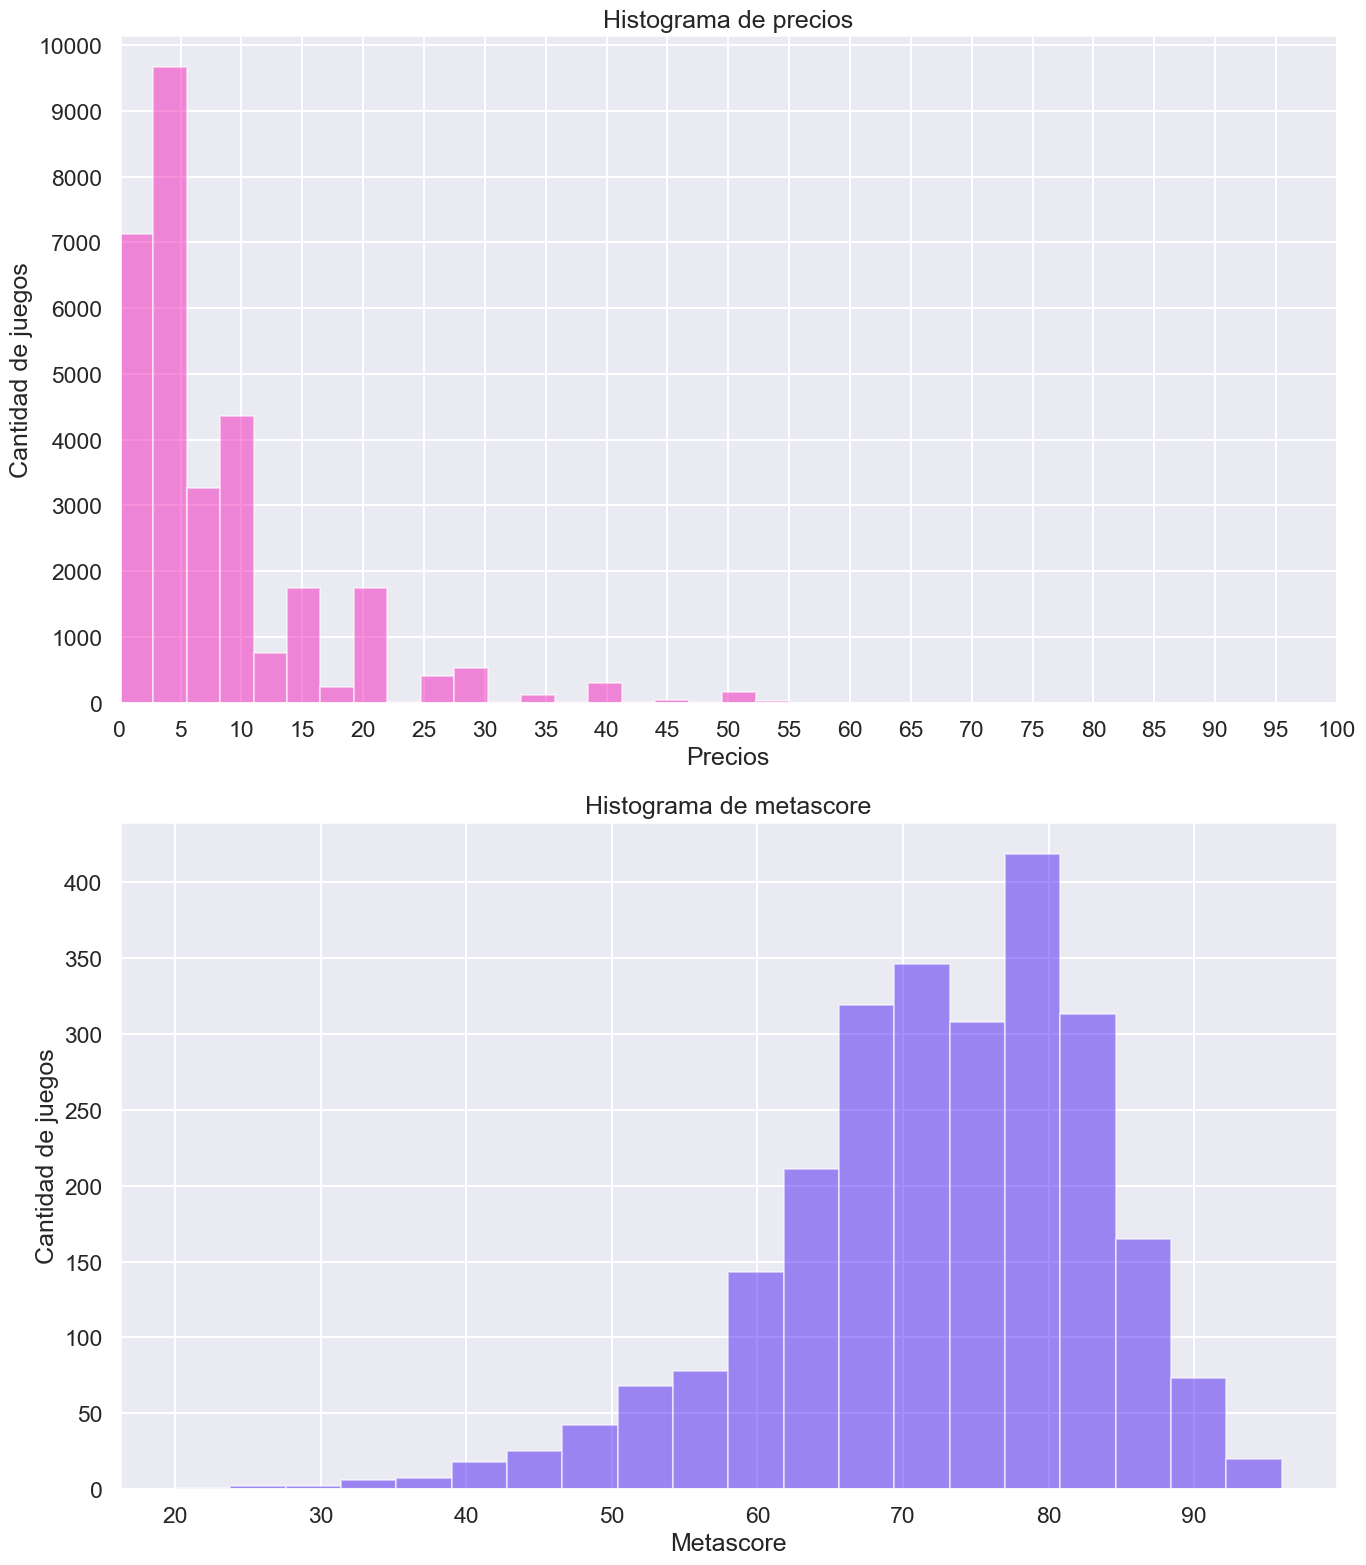

In [56]:
# Definimos el tamaño de nuestro subplot que contedrá dos filas y una columna
fig, ax = plt.subplots(2, 1, figsize= (14,16))

# Ajustamos nuestro primer gráfico
# Definimos los límites del eje x
ax[0].set_xlim(0, 100)
# Mejoramos las referencias en el eje x
ax[0].set_xticks(np.linspace(0,100,21))
# También las del eje y
ax[0].set_yticks(np.linspace(0, 11000, 12))
# Configuramos nuestro histograma
ax[0].hist(df['price'], bins= 20, color= "#F320b9", alpha= 0.5)
# Ponemos título y etiquetas
ax[0].set_title("Histograma de precios")
ax[0].set_xlabel("Precios")
ax[0].set_ylabel("Cantidad de juegos")

# Ajustamos nuestro segundo gráfico
# Configuramos el histograma
ax[1].hist(df['metascore'], bins= 20, color= "#4920F3", alpha= 0.5)
# Agregamos el títulos y etiquetas
ax[1].set_title("Histograma de metascore")
ax[1].set_xlabel("Metascore")
ax[1].set_ylabel("Cantidad de juegos")

# Mostramos los gráficos
plt.tight_layout()
plt.show()

A partir de los histogramas podemos concluir que no se necesitan más de *$10.00* para poder obtener cualquiera de los 17000 juegos por debajo de ese precio.

En el histograma del metascore de los juegos podemos ver que claramente la mayoría cumple con lo que promete y obtiene una puntuación regular *(de entre 65 y 80)*. Mientras que hay otros, muy pocos, que superan las expectativas y obtienen una puntuación mayor a 90 puntos.Por el otro lado, también hay juegos que decepcionan completamente y se les otorga una puntuación menor a 60 puntos, pero sin ser muchos tampoco.

Veamos por último, en que cantidades se reparten los géneros de los juegos, sus etiquetas y sus especificaciones.

In [57]:
# Definimos una lista de colores que están en orden degradiente que utilizaremos en todos los gráficos siguientes
gradient_colors = ['#ff006a', '#ff196a', '#ff336a', '#ff4c6a', '#ff666a', '#ff7f6a', '#ff996a', '#ffb26a', '#ffcc6a', '#ffdb6a', '#ffea6a', '#fff76a', '#f0ff6a', '#dbff6a', '#c5ff6a', '#b2ff6a', '#99ff6a', '#80ff6a', '#66ff6a', '#4cff6a', '#b3d9ff', '#99c2ff', '#80abff', '#6685ff', '#4d6eff', '#3357e6', '#1a40cc', '#0029b3', "#4b10Ff"]

In [58]:
# Importamos "ast" que nos ayudará a obtener el valor literal de las cadenas de texto
import ast
# Creamos una lista vacía
lista = []
# Iteramos dentro de la columna de "genres" que contiene strings
for registro in df['genres']:
    # Intentamos:
    try: 
        # Agragar a la lista los valores literales de los strings
        lista.append(ast.literal_eval(registro))
    # Si sucede que no se puede, porque el valor no es un string, o no tiene un valor literal, que retorne una lista vacía
    except ValueError:
        # Agrega la lista vacía
        lista.append([])
# Hacemos que la columna contenga los valores literales        
df['genres'] = lista
# Definimos un diccionario que tendrá las  cantidades de géneros
generos = {}
# Iteramos otra vez
for registro in df['genres']:
    # Que intente:
    try:
        # Iterar dentro de la lista que está en la columna "genres"
        for gen in registro:
            # Definimos una clave del diccionario en 0
            generos[f"{gen}"] = 0
    # Si existe un error en la lista iterada:
    except TypeError:
        # Que lo ignore, y continue con la siguiente iteración
        pass
# Que itere de nuevo en la columna
for registro in df['genres']:
    # Lo mismo
    try:
        # Que itere dentro de la lista 
        for gen in registro:
            # Sume 1 por cada vez que aparezca ese género en la columna
            generos[f"{gen}"] += 1
    except TypeError:
            pass


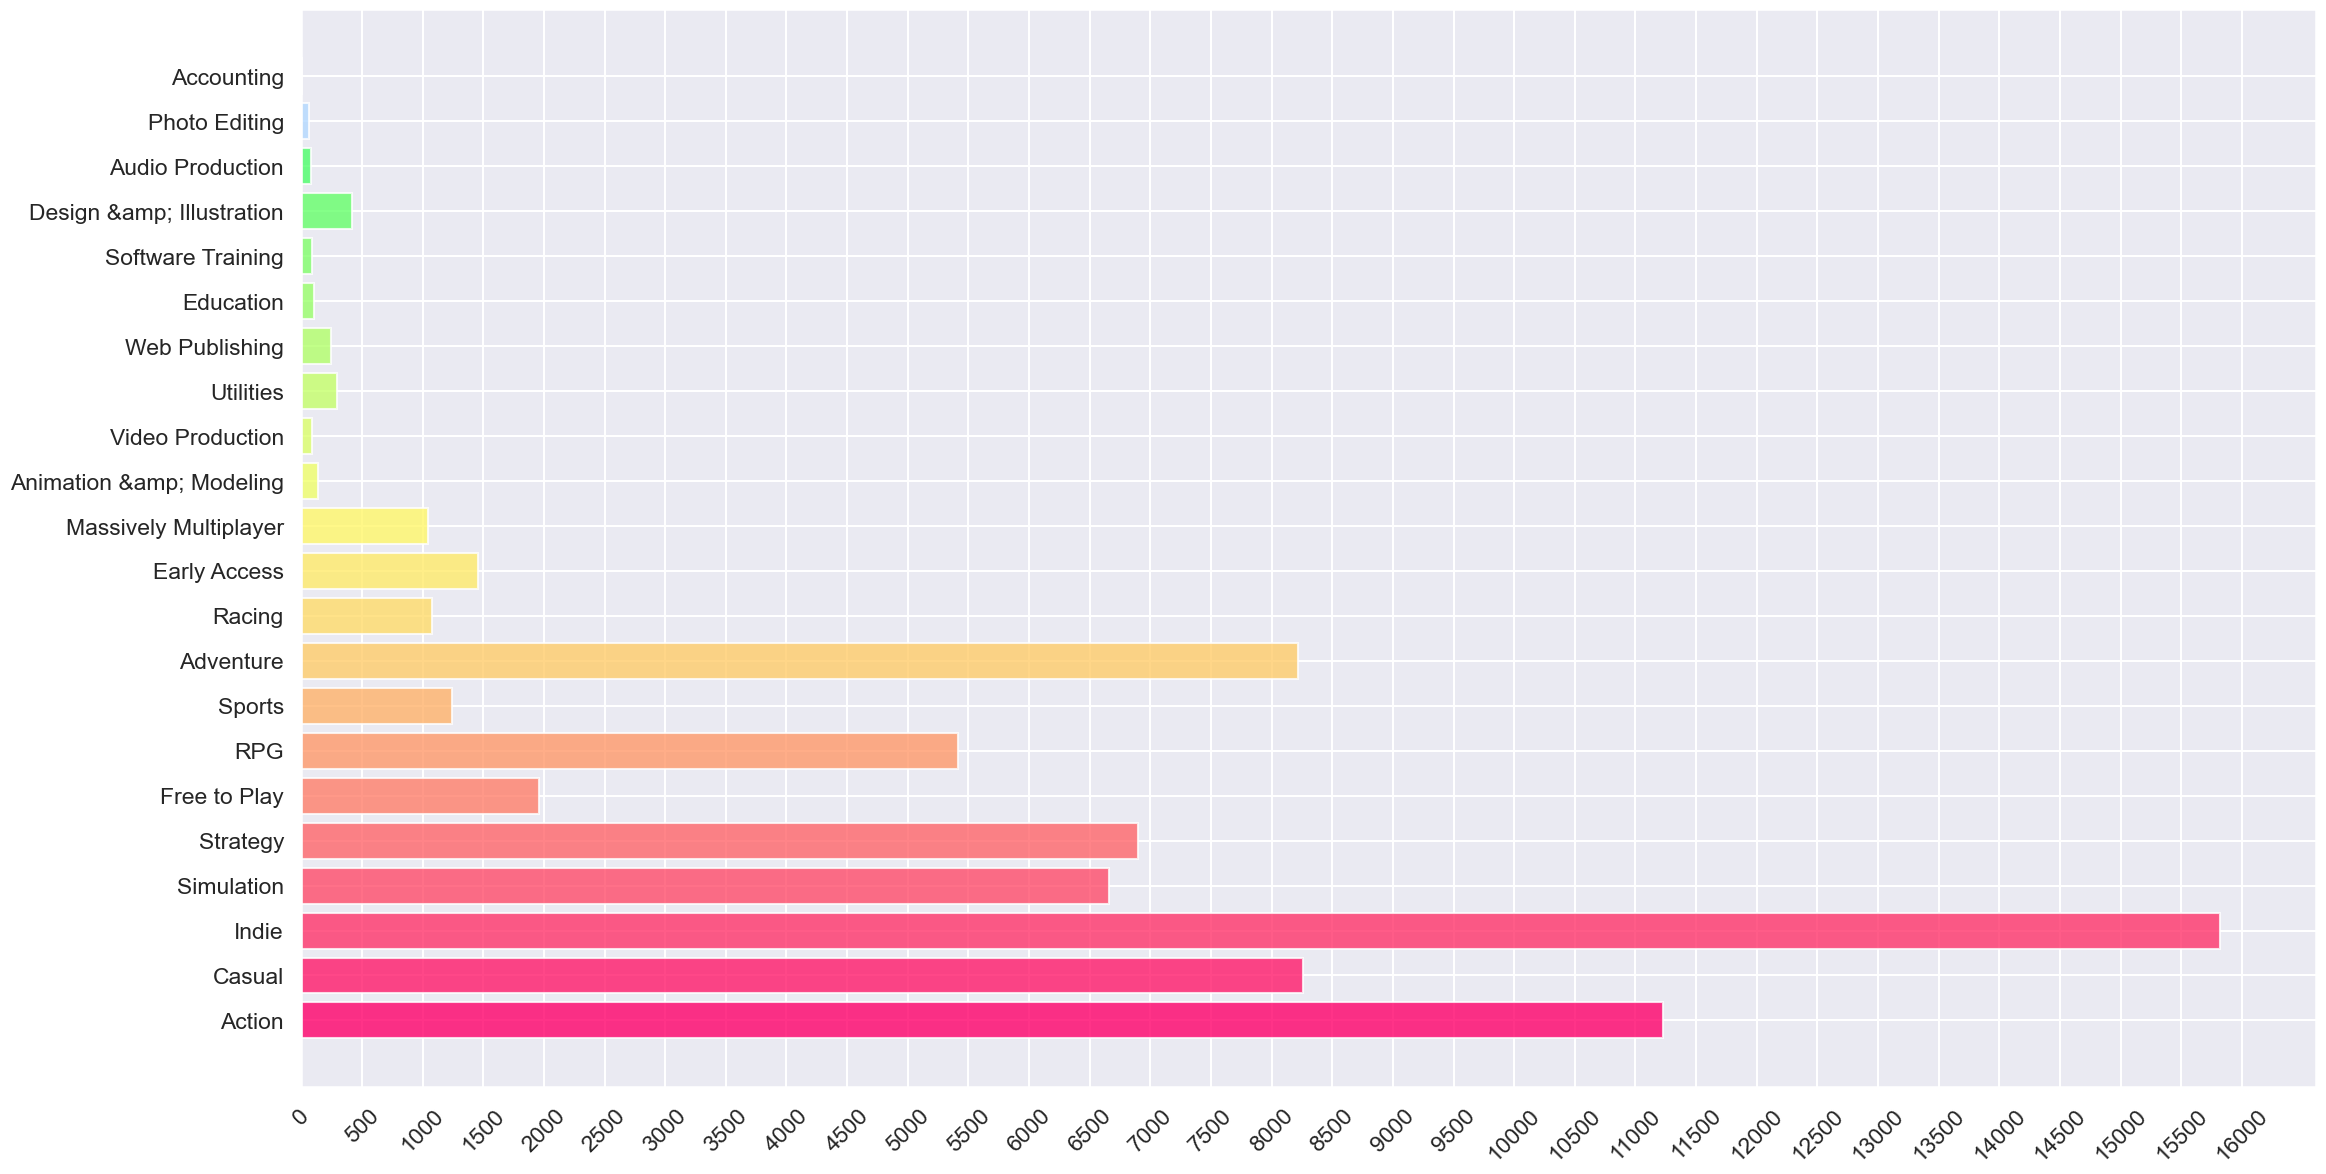

In [59]:
# Definimos el tamaño de la figura
plt.figure(figsize= (26,14))
# Configuramos el gráfico de barras horizontales
plt.barh(list(generos.keys()), list(generos.values()), color= gradient_colors, alpha= 0.8)
# Mejoramos las referencias del eje X y mostramos el gráfico
plt.xticks(np.linspace(0, 16000, 33), rotation= 45)
plt.show()

Observemos que el género que más presencia tiene al momento de calificar a los juegos por género es el género indie, seguido del género de acción. Es decir, hay más de 15000 juegos catalogados como *"indies"*.

In [60]:
# Creamos un nueva lista
lista = []
# iteramos en la columna 'tags'
for registro in df['tags']:
    # Intente:
    try:
        # Agragar el valor literal del string
        lista.append(ast.literal_eval(registro))
    # Si no:
    except ValueError:
        # Que agrague un lista vacía
        lista.append([])

# Creamos un diccionario que contendrá las etiquetas
etiquetas = {}
# Iteramos:
for registro in lista:
    # Iteramos dentro de cada lista, dentro de la columna
    for tag in registro:
        # Que cree una clave con el nombre de la etiqueta
        etiquetas[f"{tag}"] = 0
# Iteramos de nuevo 
for registro in lista:
    # Iteramos dentro de las listas, dentro de las columnas
    for tag in registro:
        # Por cada aparición que sume uno al valor de dentro del diccionario
        etiquetas[f"{tag}"] += 1
# Creamos un diccionario con una clave que sea otros.
tags = {"Other" : 0}
# Creamos la lista que contendrá las etiquetas que no aparezcan en el gráfico
relegados = []
# Iteramos en las claves del diccionario
for registro in etiquetas.keys():
    # Si la etiqueta tiene más de 1000 apariciones:
    if etiquetas[f"{registro}"] >= 1000:
        # Agregamos al nuevo diccionario la etiqueta que está en el diccionario anterior
        tags[f"{registro}"] = etiquetas[f"{registro}"]
    # Si la etiqueta tiene menos de 1000 apariciones:
    else:
        # Que se agregue a la lista de relegados
        relegados.append(registro)

# Iteramos dentro de la columna 
for registro in lista:
    # Iteramos dentro de cada lista
    for tag in registro:
        # Si la etiqueta no está en la lista de relegados:
        if tag not in relegados:
            # Ignora
            pass
        # En cambio, si está dentro de la lista de relegados:
        elif tag in relegados:
            # Agrega uno al valor de otros. 
            tags["Other"] += 1
            # Rompemos el for que itera en la fila y que pase a la siguiente.
            break
# Creamos la lista que va a contar la cantidad de etiquetas que tiene cada registro
cont = []
# Iteramos en la columna 'tags'
for e in lista:
    # Que agregue a la lista la cantidad de etiquetas que tenga ese registro
    cont.append(len(e))

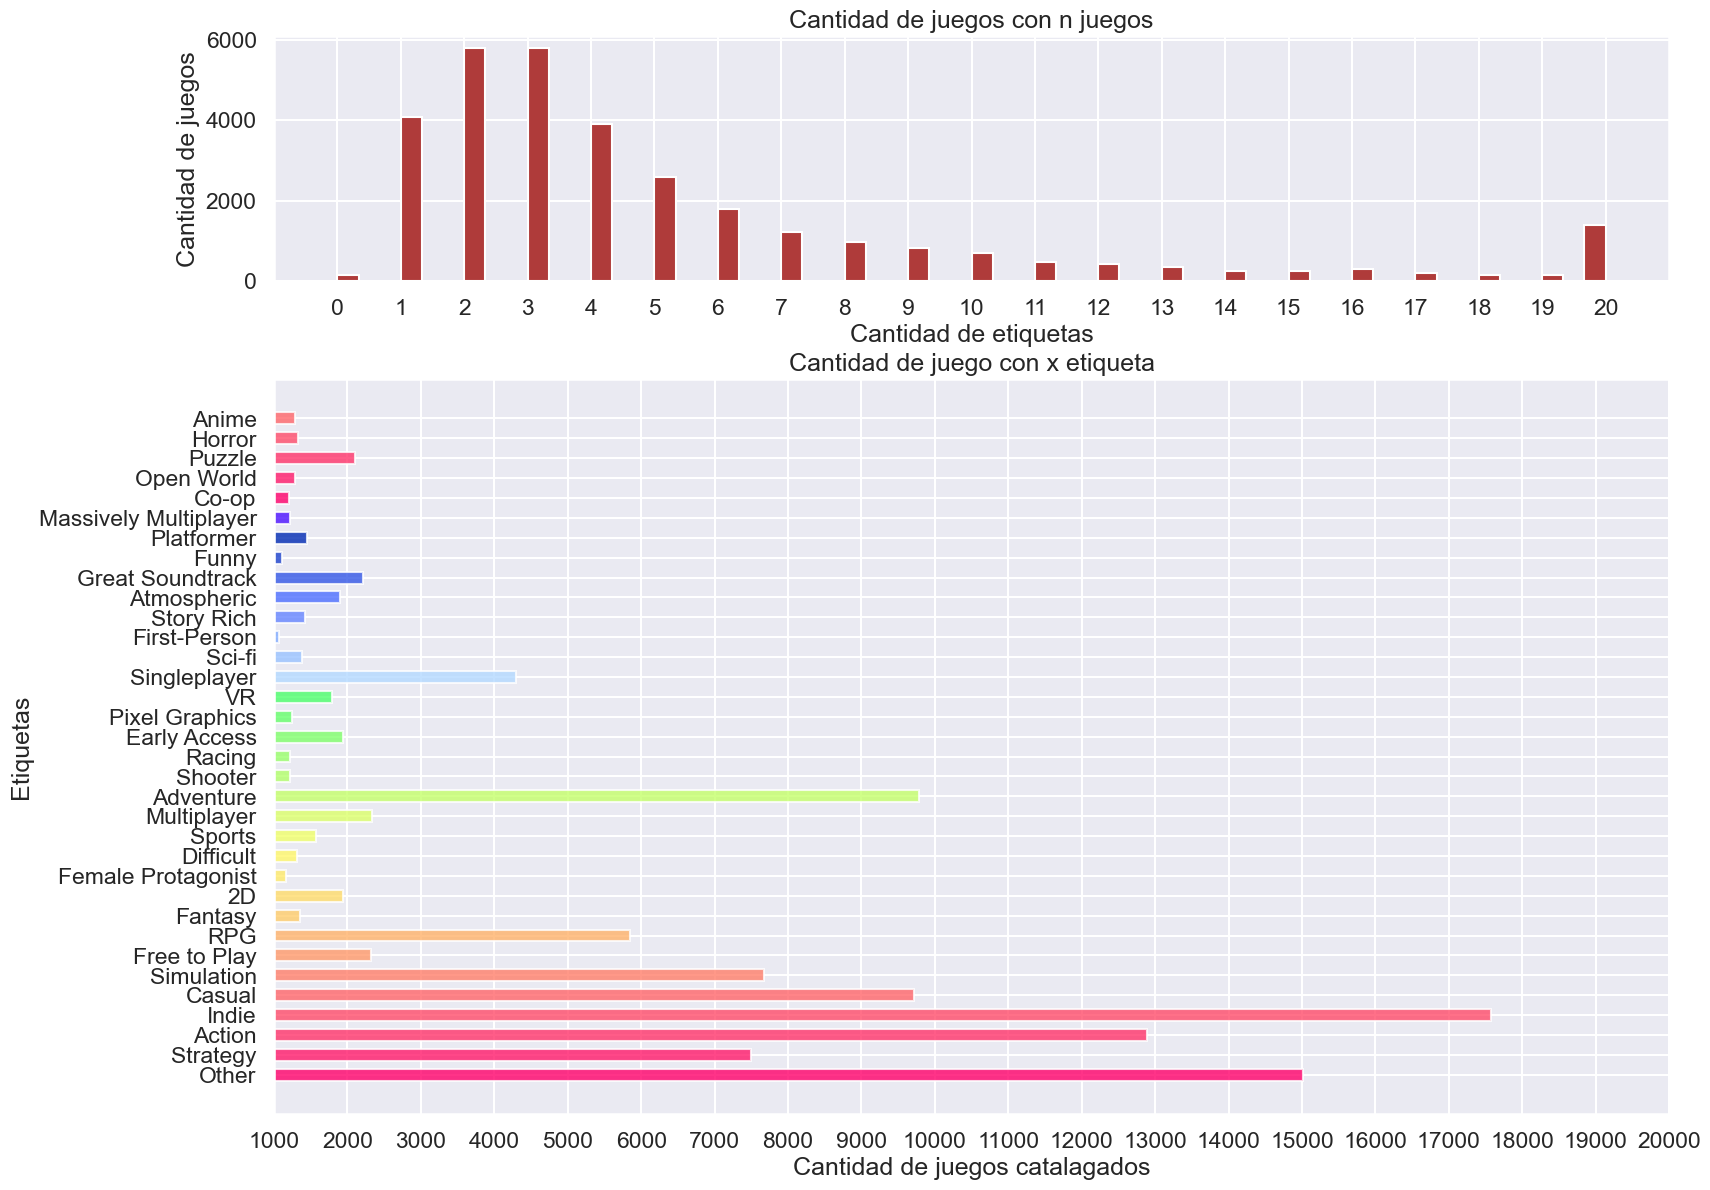

In [61]:
# Definimos el tamaño del subplot y la relación de tamaño entre ellos.
fig, ax = plt.subplots(2, 1, figsize= (18,14), gridspec_kw={'height_ratios': [1, 3]})

# Ajustamos los valores del primer gráfico.
# Configuramos el histograma.
ax[0].hist(cont, bins= 60, color= '#Af3b3a')
# Mejoramos las referencias del eje X.
ax[0].set_xticks(np.linspace(0, 20, 21))
# Agregamos un título y etiquetas
ax[0].set_title("Cantidad de juegos con n juegos")
ax[0].set_xlabel("Cantidad de etiquetas")
ax[0].set_ylabel("Cantidad de juegos")


# Ajustamos el segundo gráfico
# Configuramos el gráfico de barras horizontales
ax[1].barh(list(tags.keys()), list(tags.values()), color= gradient_colors, alpha= 0.8, height= 0.6)
# Mejoramos las referencias del eje X.
ax[1].set_xticks(np.linspace(0,20000, 21))
# Definimos los límites del eje X.
ax[1].set_xlim(1000, 20000)
# Agregamos título y etiquetas.
ax[1].set_title("Cantidad de juego con x etiqueta")
ax[1].set_ylabel("Etiquetas")
ax[1].set_xlabel("Cantidad de juegos catalagados")

# Mostramos los gráficos.
plt.show()

En el caso de las etiquetas, podemos observar en el histograma, que en la mayoría de los juegos existe una etiqueta como mínimo. Muchísimos juegos tienen entre una a cinco etiquetas. También hay juegos que poseen más etiquetas, pero mediante aumenta la cantidad de etiquetas, disminuye la cantidad de juegos que poseen esa cantidad.

Luego, en el gráfico de barras, podemos observar las etiquetas que se encuentran en más de 1000 juegos distintos. Teniendo a la etiqueta del género **indie** con aparición en más de 17000 juegos. Luego podemos ver que hay muchas más etiquetas que no entraron en este gráfico y están presentes en, poco más, de 15000 juegos. 

In [62]:
# De la misma manera que evaluamos las etiquetas, hacemos el mismo
# tratamiento para las especificaciones.
_lista_specs = []
for registro in df['specs']:
    try:
        _lista_specs.append(ast.literal_eval(registro))
    except ValueError:
        _lista_specs.append([])

e_specs = {}
for registro in _lista_specs:
    for spec in registro:
        e_specs[f"{spec}"] = 0

for registro in _lista_specs:
    for spec in registro:
        e_specs[f"{spec}"] += 1

specs = {"Other" : 0}
Rel_specs = []
for registro in e_specs.keys():
    if e_specs[f"{registro}"] >= 500:
        specs[f"{registro}"] = e_specs[f"{registro}"]
    else:
        Rel_specs.append(registro)


for registro in _lista_specs:
    for spec in registro:
        if spec not in Rel_specs:
            pass
        elif spec in Rel_specs:
            specs["Other"] += 1
            break

cont_s = []
for e in _lista_specs:
    cont.append(len(e))

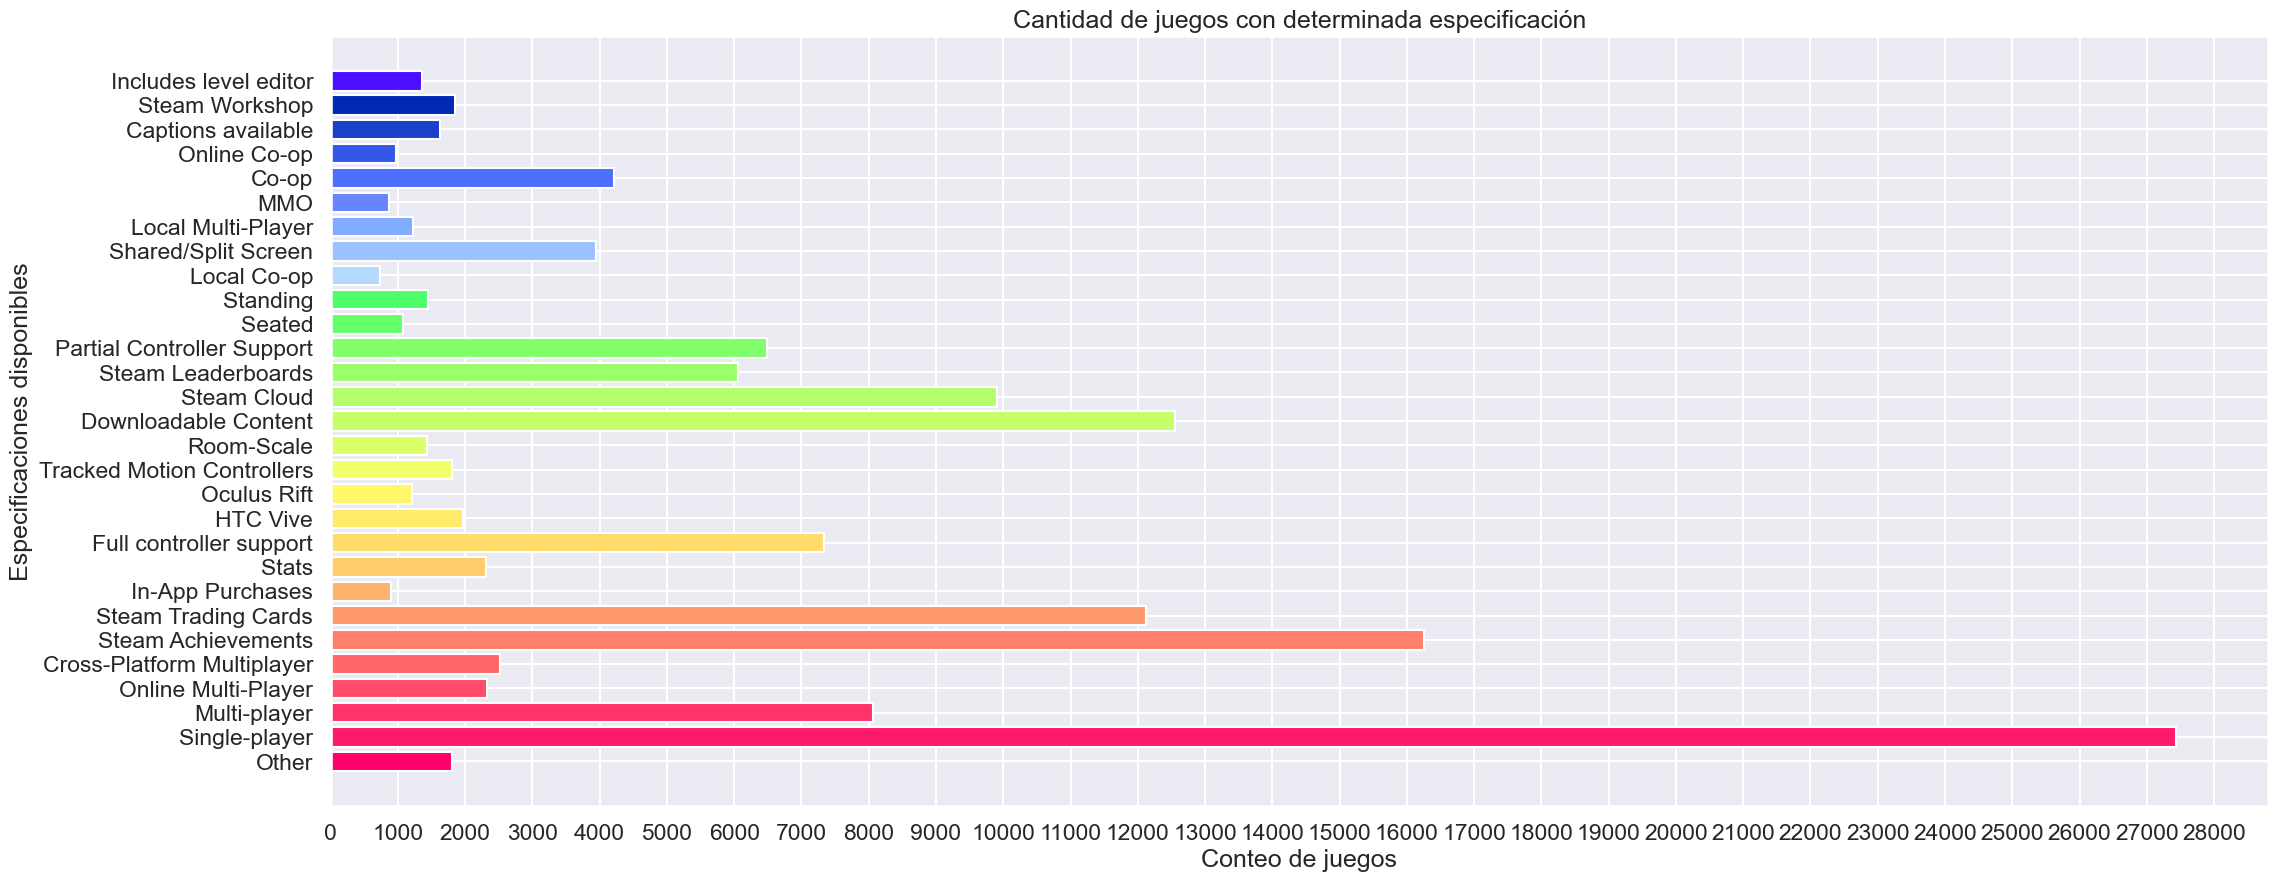

In [65]:
# Configuramos el tamaño del gráfico
plt.figure(figsize= (25, 10))
# Ajustamos el gráfico de barras horizontales
plt.barh(list(specs.keys()), list(specs.values()), color= gradient_colors)
# Agregamos el título y etiquetas.
plt.title("Cantidad de juegos con determinada especificación")
plt.xlabel("Conteo de juegos")
plt.ylabel("Especificaciones disponibles")
# Agregamos y mejoramos las referencias del eje X.
plt.xticks(np.linspace(0,28000, 29))

# Mostramos el gráfico.
plt.show()

Como podemos ver, el formato de juego **Single-Player** arrasa como especificación preferida para la creación de juegos. De todos los juegos, casi el 85% tiene esta especificación.

A continuación, exportamos el dataframe que no contiene los outliers y con el que estuvimos trabajando en este notebook:

In [64]:
# Aclaramos a la función que no exporte los índices del dataframe.
df.to_csv("without_outliers.csv", index= False)